## 1.Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importing Data from MySQL Database

In [3]:
import mysql.connector
from sqlalchemy import create_engine

In [4]:
username = 'root'
password = '123456'
host = 'localhost'         
port = '3306'              
database = 'data_analytics'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [5]:
query = "SELECT * FROM `final_dataset-checkpoint`"
df = pd.read_sql(query, engine)
df.head()

,channel_id,playlist_id,topic,Channel,PublishedAt,avg_views,avg_likes,avg_comments,num_videos,subscribers_counts,category_of_topic,playlist_total_duration
0,UC1XBh-m27kkgwLAwu_SRJBg,PLGjplNEQ1it8-0CmoljS5yeV-GlKSUEt0,Python,ShradhaKhapra,2024-01-26T13:45:05Z,1816913.0,28562.0,1444.0,9.0,538000,programming_languages,8h 56m 31s
1,UCeVMnSShP_Iviwkknt83cww,PLu0W_9lII9agwh1XjRt242xIpHhPT2llg,Python,CodeWithHarry,2022-11-28T08:39:03Z,499541.0,12270.0,992.0,100.0,7330000,programming_languages,17h 57m 12s
2,UC59K-uG2A5ogwIrHw4bmlEg,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python,Telusko,2018-06-30T13:24:43Z,813792.0,12910.0,612.0,111.0,2550000,programming_languages,15h 16m 39s
3,UCM-yUTYGmrNvKOCcAl21g3w,PLdo5W4Nhv31bZSiqiOL5ta39vSnBxpOPT,Python,JennysLecturesCSIT,2022-08-25T09:51:52Z,122589.0,1948.0,117.0,125.0,1860000,programming_languages,35h 26m 31s
4,UCCezIgC97PvUuR4_gbFUs5g,PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU,Python,CoreySchafer,2015-03-23T05:58:13Z,588719.0,12636.0,512.0,151.0,1430000,programming_languages,66h 59m 28s


## 3. Descriptive statistics of data

### Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_id               715 non-null    object 
 1   playlist_id              715 non-null    object 
 2   topic                    715 non-null    object 
 3   Channel                  715 non-null    object 
 4   PublishedAt              715 non-null    object 
 5   avg_views                715 non-null    float64
 6   avg_likes                715 non-null    float64
 7   avg_comments             715 non-null    float64
 8   num_videos               715 non-null    float64
 9   subscribers_counts       715 non-null    int64  
 10  category_of_topic        715 non-null    object 
 11  playlist_total_duration  715 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 67.2+ KB


In [8]:
df["PublishedAt"] = pd.to_datetime(df["PublishedAt"])

In [9]:
df["num_videos"] = df["num_videos"].astype(int)

In [10]:
df.head()

,channel_id,playlist_id,topic,Channel,PublishedAt,avg_views,avg_likes,avg_comments,num_videos,subscribers_counts,category_of_topic,playlist_total_duration
0,UC1XBh-m27kkgwLAwu_SRJBg,PLGjplNEQ1it8-0CmoljS5yeV-GlKSUEt0,Python,ShradhaKhapra,2024-01-26 13:45:05+00:00,1816913.0,28562.0,1444.0,9,538000,programming_languages,8h 56m 31s
1,UCeVMnSShP_Iviwkknt83cww,PLu0W_9lII9agwh1XjRt242xIpHhPT2llg,Python,CodeWithHarry,2022-11-28 08:39:03+00:00,499541.0,12270.0,992.0,100,7330000,programming_languages,17h 57m 12s
2,UC59K-uG2A5ogwIrHw4bmlEg,PLsyeobzWxl7poL9JTVyndKe62ieoN-MZ3,Python,Telusko,2018-06-30 13:24:43+00:00,813792.0,12910.0,612.0,111,2550000,programming_languages,15h 16m 39s
3,UCM-yUTYGmrNvKOCcAl21g3w,PLdo5W4Nhv31bZSiqiOL5ta39vSnBxpOPT,Python,JennysLecturesCSIT,2022-08-25 09:51:52+00:00,122589.0,1948.0,117.0,125,1860000,programming_languages,35h 26m 31s
4,UCCezIgC97PvUuR4_gbFUs5g,PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU,Python,CoreySchafer,2015-03-23 05:58:13+00:00,588719.0,12636.0,512.0,151,1430000,programming_languages,66h 59m 28s


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   channel_id               715 non-null    object             
 1   playlist_id              715 non-null    object             
 2   topic                    715 non-null    object             
 3   Channel                  715 non-null    object             
 4   PublishedAt              715 non-null    datetime64[ns, UTC]
 5   avg_views                715 non-null    float64            
 6   avg_likes                715 non-null    float64            
 7   avg_comments             715 non-null    float64            
 8   num_videos               715 non-null    int32              
 9   subscribers_counts       715 non-null    int64              
 10  category_of_topic        715 non-null    object             
 11  playlist_total_duration  715 non

### Statistics

In [13]:
df.describe()

,avg_views,avg_likes,avg_comments,num_videos,subscribers_counts
count,7.150000e+02,715.000000,715.000000,715.000000,7.150000e+02
mean,2.485785e+05,3907.058741,206.081119,47.026573,9.994733e+05
std,1.537972e+06,35848.618616,2164.816092,104.076508,2.049726e+06
min,4.200000e+01,0.000000,0.000000,1.000000,0.000000e+00
25%,7.788000e+03,110.500000,9.000000,14.000000,3.170000e+04
50%,3.115400e+04,514.000000,28.000000,27.000000,2.200000e+05
75%,1.056435e+05,1600.500000,91.000000,53.000000,9.290000e+05
max,2.814246e+07,938418.000000,57267.000000,2464.000000,2.010000e+07


# Data Cleaning

In [127]:
df.isnull().sum()

channel_id                 0
playlist_id                0
topic                      0
Channel                    0
PublishedAt                0
avg_views                  0
avg_likes                  0
avg_comments               0
num_videos                 0
subscribers_counts         0
category_of_topic          0
playlist_total_duration    0
dtype: int64

In [31]:
df=df[(df['topic']!="Ruby")]

In [35]:
df.shape

(701, 12)

# Data visualization
To uncover patterns and trends, dive deep into the dataframes using visualization techniques

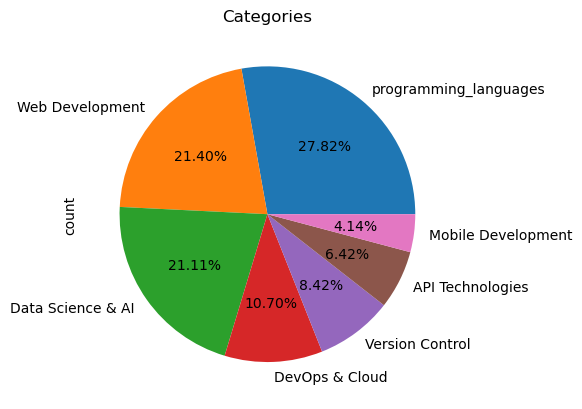

In [38]:
df['category_of_topic'].value_counts()[:7].plot.pie(autopct='%.2f%%')
plt.title('Categories')
plt.show()

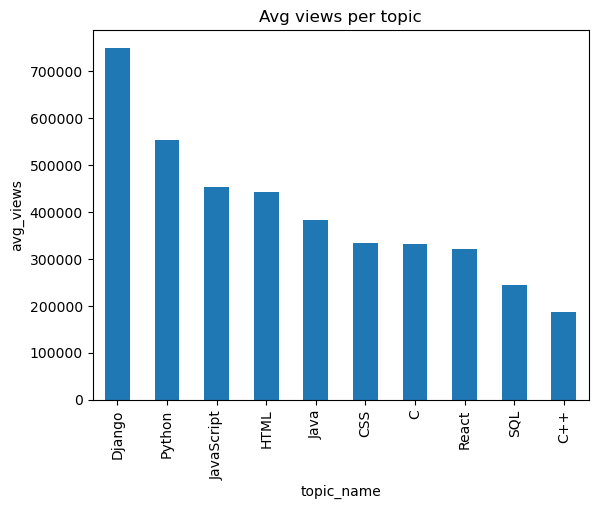

In [40]:
df.groupby(['topic'])['avg_views'].mean().sort_values(ascending=False)[:10].plot.bar()
plt.xticks(rotation=90)
plt.xlabel('topic_name')
plt.ylabel('avg_views')
plt.title('Avg views per topic')
plt.show()

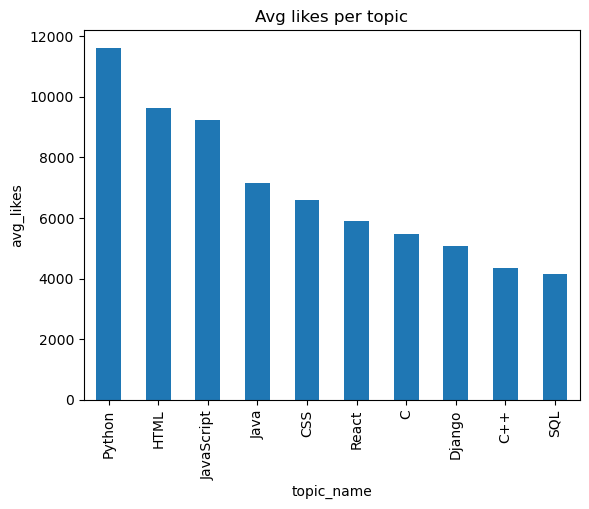

In [42]:
df.groupby(['topic'])['avg_likes'].mean().sort_values(ascending=False)[:10].plot.bar()
plt.xticks(rotation=90)
plt.xlabel('topic_name')
plt.ylabel('avg_likes')
plt.title('Avg likes per topic')
plt.show()

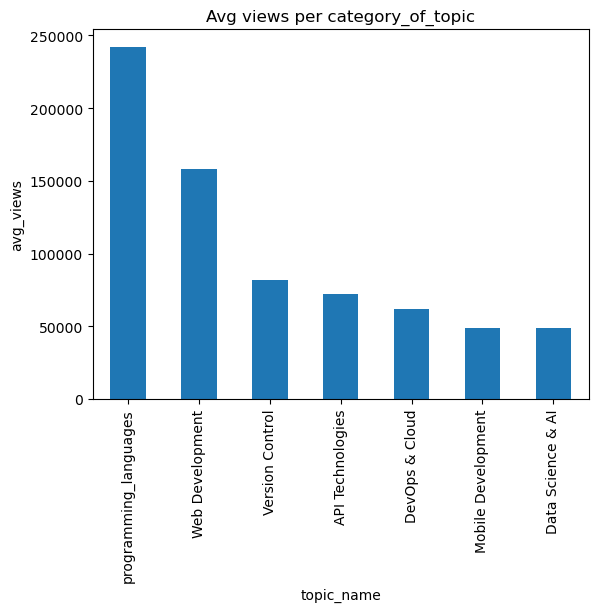

In [44]:
df.groupby(['category_of_topic'])['avg_views'].mean().sort_values(ascending=False)[:10].plot.bar()
plt.xticks(rotation=90)
plt.xlabel('topic_name')
plt.ylabel('avg_views')
plt.title('Avg views per category_of_topic')
plt.show()

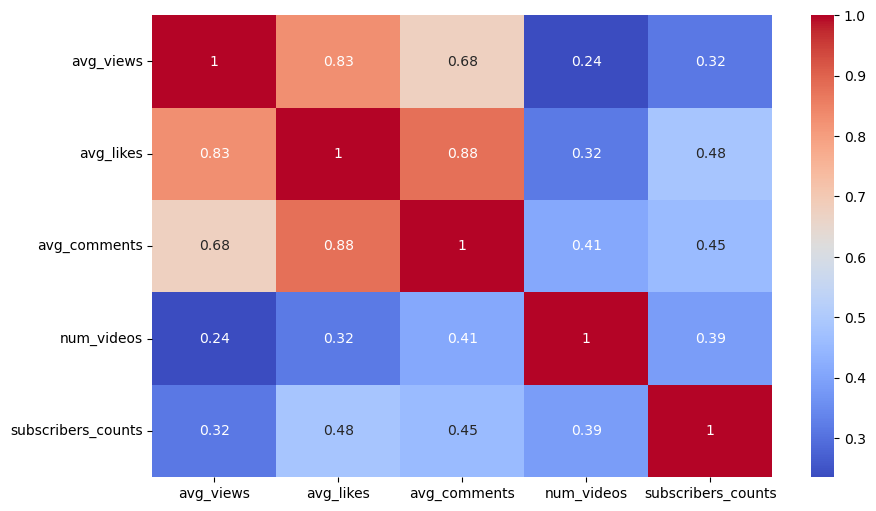

In [46]:
corr_matrix = df[["avg_views", "avg_likes", "avg_comments", "num_videos", "subscribers_counts"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

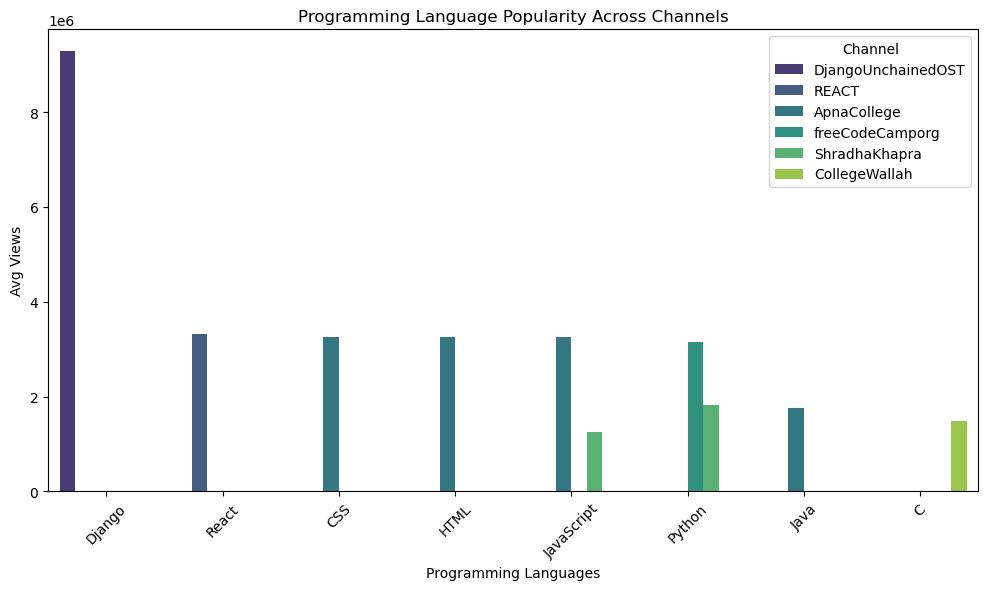

In [48]:
channel_trends = df.groupby(["topic", "Channel"])["avg_views"].mean().reset_index()
top_channels = channel_trends.sort_values(by="avg_views", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x="topic", y="avg_views", hue="Channel", data=top_channels, palette="viridis")
plt.xticks(rotation=45)
plt.title("Programming Language Popularity Across Channels")
plt.xlabel("Programming Languages")
plt.ylabel("Avg Views")
plt.legend(title="Channel")
plt.show()

In [66]:
df['year']=df["PublishedAt"].dt.year


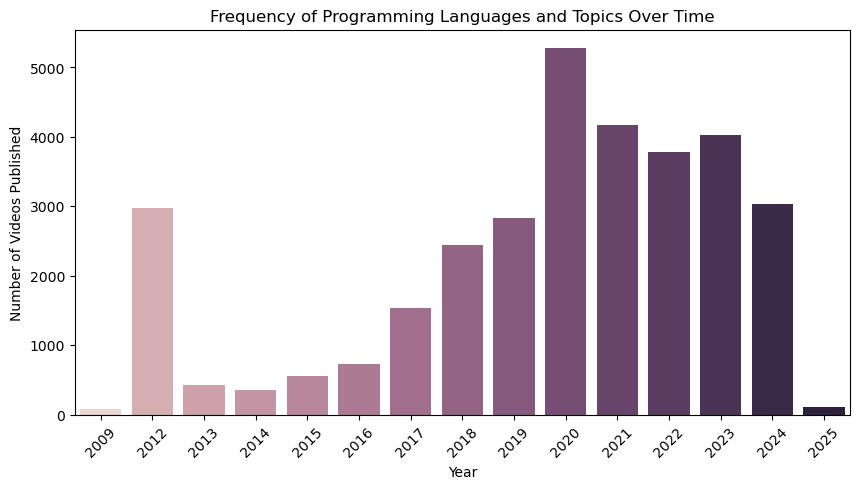

In [76]:
yearly_counts = df.groupby(['year'])['num_videos'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values,hue=yearly_counts.index, legend = False)
plt.title("Frequency of Programming Languages and Topics Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Videos Published")
plt.xticks(rotation=45)
plt.show()